# Introduction

The following notebook sets out to build various different machine learning models, to compare the accuracies from different techniques and builds on Part 1.

# Library Imports

In [1]:
# import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

# Utility Functions

In [2]:
#Overall Summary:
def basic_eda(df,df_name):
    """
    Summary: This function summarises key metrics regarding a dataset, to be used in the data checking phase, 
    including the % of null and duplicate rows. 
    
    Inputs: df = dataframe to check.
            df_name = name of the dataframe to check.
            
    Outputs: - Number of Rows/Columns.
             - Percentage of null rows
             - Percentage of duplicate rows
             - Data types
    
    """
    print(df_name.upper())
    print()
    print(f'Rows: {df.shape[0]} \t Columnss: {df.shape[1]}')
    
    print(f'Total null rows: {df.isnull().sum().sum()}')
    print(f'Percentage null rows: {round(df.isnull().sum().sum()/df.shape[0]* 100,2)}%')
    print()
    
    print(f"Total duplicate rows: {df[df.duplicated(keep=False)].shape[0]}")
    print(f"Percentage dupe rows: {round(df[df.duplicated(keep=False)].shape[0]/df.shape[0]*100,2)}%")
    print()
    
    print(df.dtypes)
    print("----\n")

In [3]:
def PlotBoundaries(model, X, Y, plotsize=(6,4)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=plotsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

# Data Import

In [4]:
train_data = pd.read_csv('./data/clean_data/clean_train_dataframe.csv')

In [5]:
test_data = pd.read_csv('./data/clean_data/clean_test_dataframe.csv')

In [6]:
train_data.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
basic_eda(train_data, 'clean train data')

CLEAN TRAIN DATA

Rows: 12798 	 Columnss: 2744
Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

Additional_Number_of_Scoring           int64
Average_Score                        float64
Review_Total_Negative_Word_Counts      int64
Total_Number_of_Reviews                int64
Review_Total_Positive_Word_Counts      int64
                                      ...   
n_year                                 int64
n_yes                                  int64
n_yet                                  int64
n_young                                int64
rating                                 int64
Length: 2744, dtype: object
----



In [283]:
basic_eda(test_data, 'clean test data')

CLEAN TEST DATA

Rows: 4267 	 Columnss: 2744
Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

Additional_Number_of_Scoring           int64
Average_Score                        float64
Review_Total_Negative_Word_Counts      int64
Total_Number_of_Reviews                int64
Review_Total_Positive_Word_Counts      int64
                                      ...   
n_year                                 int64
n_yes                                  int64
n_yet                                  int64
n_young                                int64
rating                                 int64
Length: 2744, dtype: object
----



The data looks clean, with no missing values or duplicate rows.

# Linear Classifier (logistic regression)

The first model to be fitted to the data is a logistic regression model, using the solver 'lbgs'. The full training dataset is to be used.

In [12]:
#split the train data
y_train = train_data['rating']
X_train = train_data.drop(columns='rating')

In [13]:
#split the test data
y_test = test_data['rating']
X_test = test_data.drop(columns='rating')

In [14]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# instantiate a logistic regression
logit = LogisticRegression(solver='lbfgs', max_iter=300, random_state=1)

# fit the model to train set only
logit.fit(X_train, y_train)

# score the model accuracy scores and store in variables for display later
acc_train_baseline = logit.score(X_train, y_train)
acc_test_baseline = logit.score(X_test, y_test)

# scores
print(f"train accuracy: {acc_train_baseline}")
print(f"test accuracy: {acc_test_baseline}")

train accuracy: 0.885841537740272
test accuracy: 0.7328333723927818


This initial model has a test accuracy of 73%. Let's check the split of 1s and 0s in the `y_train` to see how this compares to a random guess.

In [16]:
y_train.value_counts(normalize=True)

1    0.576106
0    0.423894
Name: rating, dtype: float64

The basline model accuracy is significantly higher than if one was to make a random guess.

The indices of the positive and negative columns need to be identified. The coefficients unique to the positive and negative columns need to be obtained separately. From here, the coefficients can be sorted and the indices of the top 20 can be extracted, ultimately meaning the top 20 most useful words can be extracted for both positive and negative reviews. Note that words which are more important for predicting a negative review will have a smaller coefficient, so instead of looking at the top 20 coefficients, the bottom 20 coefficients are used instead.

In [17]:
#obtain a np array containing all coefficients
coefficients = logit.coef_
#obtain indices of X_train where prefix is p_
positive_cols = np.where([column.startswith('p_') for column in train_data.columns])

In [18]:
#the column numbers that contain the positive tokens
positive_cols

(array([ 417,  418,  419,  420,  421,  422,  423,  424,  425,  426,  427,
         428,  429,  430,  431,  432,  433,  434,  435,  436,  437,  438,
         439,  440,  441,  442,  443,  444,  445,  446,  447,  448,  449,
         450,  451,  452,  453,  454,  455,  456,  457,  458,  459,  460,
         461,  462,  463,  464,  465,  466,  467,  468,  469,  470,  471,
         472,  473,  474,  475,  476,  477,  478,  479,  480,  481,  482,
         483,  484,  485,  486,  487,  488,  489,  490,  491,  492,  493,
         494,  495,  496,  497,  498,  499,  500,  501,  502,  503,  504,
         505,  506,  507,  508,  509,  510,  511,  512,  513,  514,  515,
         516,  517,  518,  519,  520,  521,  522,  523,  524,  525,  526,
         527,  528,  529,  530,  531,  532,  533,  534,  535,  536,  537,
         538,  539,  540,  541,  542,  543,  544,  545,  546,  547,  548,
         549,  550,  551,  552,  553,  554,  555,  556,  557,  558,  559,
         560,  561,  562,  563,  564, 

In [19]:
#an array that contains all of the coefficients for the positive tokens
all_positive_coefficients = coefficients[0,positive_cols]

In [20]:
#index of the postive_cols list associated with the most important positive words. Note that these are the indexes of the values found in all_positive_coefficients
top_20_posi_indices = coefficients[0, positive_cols].argsort()[0][::-1][:20]

In [21]:
# get a list of the column numbers in main train_data associated with the top 20 most important words
top_20_posi_columns =[positive_cols[0][i] for i in top_20_posi_indices]

In [22]:
top_20_posi_words = [train_data.columns[i] for i in top_20_posi_columns]
top_20_posi_words

['p_gift',
 'p_excellent',
 'p_incredible',
 'p_exceed',
 'p_impeccable',
 'p_everything',
 'p_hair',
 'p_great',
 'p_staff',
 'p_deluxe',
 'p_arrange',
 'p_special',
 'p_could',
 'p_exceptional',
 'p_amazingly',
 'p_already',
 'p_fantastic',
 'p_perfect',
 'p_amaze',
 'p_bridge']

The top 20 positive words are shown above. The same process now needs to be repeated for the negative words. However, when it comes to looking at the coefficients for negative words, the more negative the coefficient, the more important it is classifying a review as negative. This is a slight nuance that needs to be edited in the code below.

In [23]:
#obtain a np array containing all coefficients
coefficients = logit.coef_
#obtain indices of X_train where prefix is n_
negative_cols = np.where([column.startswith('n_') for column in train_data.columns])
#index of the postive_cols list associated with the most important positive words
top_20_negi_indices = coefficients[0, negative_cols].argsort()[0][:20]
# get a list of the column numbers in main train_data associated with the top 20 most important words
top_20_negi_columns =[negative_cols[0][i] for i in top_20_negi_indices]
top_20_negi_words = [train_data.columns[i] for i in top_20_negi_columns]
top_20_negi_words

['n_premier',
 'n_moment',
 'n_wood',
 'n_star',
 'n_confirmation',
 'n_lodge',
 'n_staff',
 'n_room',
 'n_unfriendly',
 'n_holiday',
 'n_uncomfortable',
 'n_air',
 'n_daylight',
 'n_refuse',
 'n_attitude',
 'n_basic',
 'n_interest',
 'n_rude',
 'n_smelt',
 'n_dusty']

# Dimensionality reduction with PCA

In [24]:
#initiate model with full dimensionality

#split the train data
y_train = train_data['rating']
X_train = train_data.drop(columns='rating')
#split the test data
y_test = test_data['rating']
X_test = test_data.drop(columns='rating')
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# instantiate a logistic regression
logit = LogisticRegression(solver='lbfgs', max_iter=300)


_The cell below is commented out as it can take a while to run_

In [25]:
# %%timeit
# logit.fit(X_train, y_train)

4.67 s ± 285 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The run time for the logistic model with full dimensionality is 5 s ± 130 ms per loop. 

Let's try a range of the proportion of variance accounted for by the PCAs, which ultimately provides a range of how many PCAs are used. Then plot this proportion of variance retained against the time it takes to fit the model.

_note that the below cell is commented out as it can take 5 minutes to run...load pickles instead_

In [25]:
# #initiate model with full dimensionality
# import time
# #split the train data
# y_train = train_data['rating']
# X_train = train_data.drop(columns='rating')
# #split the test data
# y_test = test_data['rating']
# X_test = test_data.drop(columns='rating')

# #scale the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_sc = scaler.transform(X_train)
# X_test_sc = scaler.transform(X_test)
# duration = []
# pca_vals = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
# #dimension reduction
# for p in pca_vals:
#     my_pca = PCA(n_components=p)
#     my_pca.fit(X_train_sc)
#     X_train_pca = my_pca.transform(X_train_sc)
#     X_test_pca = my_pca.transform(X_test_sc)

#     # instantiate a logistic regression
#     logit = LogisticRegression(solver='lbfgs', max_iter=300)
#     start = time.time()
#     logit.fit(X_train_pca, y_train)
#     end = time.time()
#     duration.append(end-start)

In [33]:
# #the lists below are pickled to avoid having to run the cell above which takes a while
# import joblib
# pca_vals = joblib.dump(pca_vals,'pca_vals.pkl')
# duration = joblib.dump(duration, 'duration.pkl')

In [27]:
import joblib
pca_vals = joblib.load('pca_vals.pkl')
duration = joblib.load('duration.pkl')

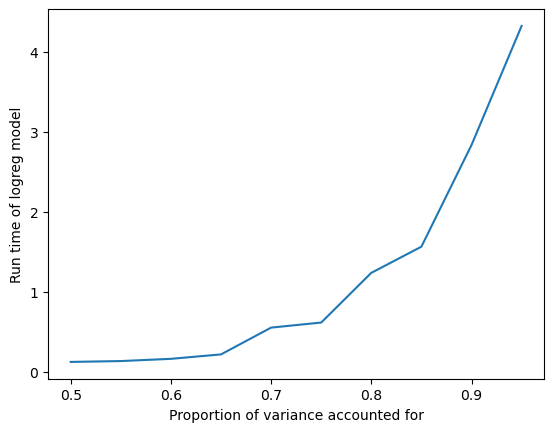

In [28]:
plt.plot(pca_vals,duration)
plt.xlabel('Proportion of variance accounted for')
plt.ylabel('Run time of logreg model');

As can be seen in the graph above, as the proportion of variance accounted for by the PCA increases (aka the number of principal components increases), the run time of the model also increases. This is unsurprising, as a proportion of 0.95 is saying that the PCAs acccount for almost all of the varirance in the model. Hence, there is a large number of PCAs, and so the model will naturally take longer to fit the greater number of dimensions. 

One advantage of dimensionality reduction is that it can help to reduce the number of predictor variables in a dataset. Too many variables can often lead to models overfititng, ultimately meaning that our models will not generalise well on new data, performing poorly on unseen data. Too many variables can also slow down our model significantly, and so PCA can lead to computational performance benefits as well.

One disadvantage of PCA is that it makes interpreting the model much more difficult. By combining dimensions, one loses the ability to work out which variables are most and least important for predicting the target variable. 

# KNN

A baseline KNN model is fitted below, with no hyperparameter optimisation, using an initial number of neighbours equal to 5. Lets plot the two PCAs on a scatter graph to see if there is any noticeable grouping.

In [29]:
#split the train data
y_train = train_data['rating']
X_train = train_data.drop(columns='rating')
#split the test data
y_test = test_data['rating']
X_test = test_data.drop(columns='rating')

#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#dimension reduction
my_pca = PCA(n_components=2)
my_pca.fit(X_train)
X_train_2_pca = my_pca.transform(X_train)
X_test_2_pca = my_pca.transform(X_test)

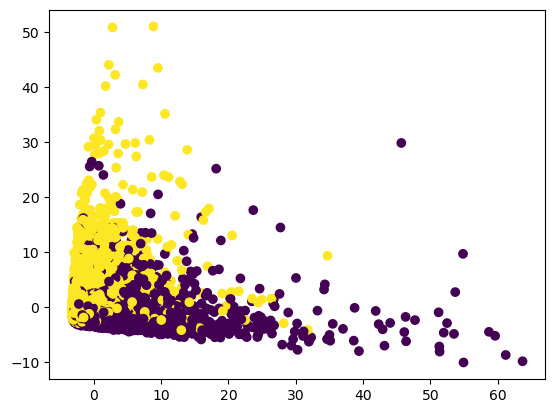

In [30]:
plt.scatter(X_train_2_pca[:,0], X_train_2_pca[:,1], c=y_train)

From an initial plot of the two PCAs, there appears to be a noticable split of the two classes. Let's build a baseline KNN model and visualise the boundaries that it is picking up on, using only 2 PCAs as part of this exploratory activity.

In [31]:
#Instantiate KNN model
my_knn = KNeighborsClassifier(n_neighbors=5)
my_knn.fit(X_train_2_pca,y_train)

KNeighborsClassifier()

In [32]:
PlotBoundaries(my_knn, X_train_2_pca,y_train, plotsize=(10,7))

As can be seen, by visualising KNN on just 2 PCA, one can see that the KNN is doing a fairly good job at splitting the boundary. Let's keep 5 neighbours and re run using the full train dataset.

In [33]:
#split the train data
y_train = train_data['rating']
X_train = train_data.drop(columns='rating')
#split the test data
y_test = test_data['rating']
X_test = test_data.drop(columns='rating')

#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


_The below cell is commented out as it takes a while to run_

In [32]:
# %%timeit
# #Instantiate KNN model
# my_knn = KNeighborsClassifier(n_neighbors=5)
# #fit the model
# my_knn.fit(X_train,y_train)

# #scores
# print(f'Train accuracy score: {my_knn.score(X_train, y_train)}')
# print(f'Test accuracy score: {my_knn.score(X_test,y_test)}')

/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.751211126738553


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6367471291305367


KeyboardInterrupt: 

As can be seen from this initial model, overfitting seems to be an issue. The test accuracy is 63.7%, whilst the training accuracy is 75.1%.

### Exploring relationship betwen run time and number of observations

In [34]:
X_train.shape

(12798, 2743)

Currently the train data set has 12798 rows. Let's compare the time KNN takes to run with the original train set, and a train set that takes a random sample of 50% of the original train data.

Sampling the original train and test dataframes...

In [34]:
train_data_sample = train_data.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5))

Proportion of positive and negative reviews in full training data...

In [35]:
train_data.rating.value_counts(normalize=True)

1    0.576106
0    0.423894
Name: rating, dtype: float64

In [36]:
train_data.shape

(12798, 2744)

Proportion of positive and negative reviews in sampled training data...

In [37]:
train_data_sample.rating.value_counts(normalize=True)

1    0.576118
0    0.423882
Name: rating, dtype: float64

In [38]:
train_data_sample.shape

(6398, 2744)

From the above, we can see that the original train dataframe has been successfully sampled, maintaining the original proportions of target varible 'rating'. The sampled data is 50% of the original dataframe. Let's repeat for test_data.

In [39]:
test_data_sample = test_data.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [40]:
test_data_sample.shape

(2133, 2744)

In [41]:
#split the train data into X and y
y_train_sample = train_data_sample['rating']
X_train_sample = train_data_sample.drop(columns='rating')
#split the test data into X and y
y_test_sample = test_data_sample['rating']
X_test_sample = test_data_sample.drop(columns='rating')

In [42]:
#scale the sampled data
scaler = StandardScaler()
scaler.fit(X_train_sample)
X_train_sample = scaler.transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)

_The below cell is commented out as it takes a while to run_

In [91]:
# %%timeit
# #Instantiate KNN model
# my_knn = KNeighborsClassifier(n_neighbors=5)
# #fit the model
# my_knn.fit(X_train_sample,y_train_sample)
# #scores
# print(f'Train accuracy score: {my_knn.score(X_train_sample, y_train_sample)}')
# print(f'Test accuracy score: {my_knn.score(X_test_sample,y_test_sample)}')

/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score: 0.6441779110444777


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train accuracy score: 0.753
Test accuracy score: 0.6441779110444777
2.74 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The knn model takes 2.74 s ± 37.5 ms per loop using the sampled dataset. With the dataset that is twice as big, the knn takes 18.4 s ± 376 ms per loop (see timeit results from the end of Qu2a). Hence, one can see significant savings in computational speed, with no diffence in the test accuracy (64%).

One main advantage of reducing the number of observations is that it can significantly speed up computation time. When trying to optimise parameters this can be particularly useful.

One disadvantage of reducing the number of observations is that if too many observations are removed from the initial dataset, undersampling can be an issue. The model will struggle to learn the patterns of the data sufficiently well, and will not be exposed to as many nuances in the data. As such, when the model is deployed and exposed to a new dataset, it may struggle to identify class boundaries sufficiently. 

#### Finding optimal k-value

To find an optimal value for K in the KNN algorithm, the Cross Validation is to be utilised. Cross validation is used in combination with a pipeline, to ensure that the data is scaled within each fold separately. This means that the scaler is fit to only the training data, and not the validation data as well. By doing this, it means that data leakage does not occur.

_NB the below code is commented out as it takes a while to run_

In [68]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_accuracies = []
# k_values = list(range(1,40,2))
# for value in k_values:
#     estimators = [('normalise', StandardScaler()),
#               ('knn', KNeighborsClassifier(n_neighbors=value))]
#     pipe = Pipeline(estimators)     
#     cv_acc = np.mean(cross_val_score(pipe, X_train_sample, y_train_sample, cv=kfold, n_jobs=-1))
#     cv_accuracies.append(cv_acc)

/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [69]:
# #the lists below are pickled to avoid having to run the cell above which takes a while
# import joblib
# k_values = joblib.dump(k_values,'k_values.pkl')
# cv_accuracies = joblib.dump(cv_accuracies, 'cv_accuracies.pkl')

In [43]:
k_values = joblib.load('k_values.pkl')
cv_accuracies = joblib.load('cv_accuracies.pkl')

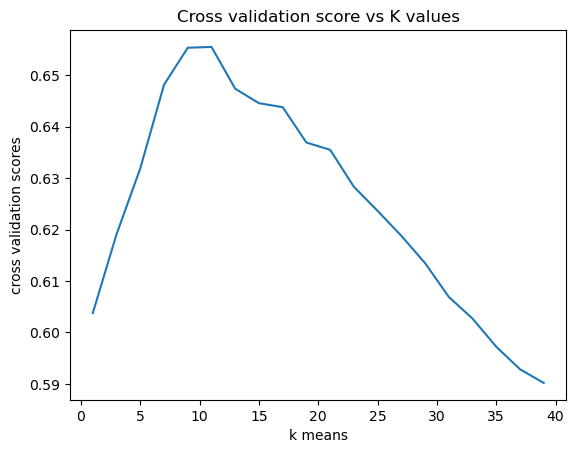

In [44]:
plt.plot(k_values, cv_accuracies)
plt.title('Cross validation score vs K values')
plt.xlabel('k means')
plt.ylabel('cross validation scores');

In [45]:
k_values[np.array(cv_accuracies).argmax()]

11

In [46]:
max(cv_accuracies)

0.6555225029319781

From the above, one can see that the k value that achieves the highest cross validation score is k=11, with an accuracy = 0.655. This accuracy is a slight improvement on the accuracy score from Qu2b.

The issue with splitting the data into train and validation sets after vectorisation is that it is a form of data leakage. The validation dataset has come from the larger train dataset. This means that every feature in the validation set is already in the train data set, meaning that every word in the validation review will be used. If the validation had some words which were not in the training dataset, they would be ignored and so the accuracy scores may well be lower if vectorisation was carried out after splitting the training and validation data sets.

# Decision Tree

For the following Decision Tree model, a baseline model is built, using all of the train and test data. As this is a baseline model and one is not looking at hyperparameter optimisation, cross validation is not used. The sampled dataset is to be used to ensure consistency across the tests.

In [47]:
#split the train data
y_train_sample = train_data_sample['rating']
X_train_sample = train_data_sample.drop(columns='rating')
#split the test data
y_test_sample = test_data_sample['rating']
X_test_sample = test_data_sample.drop(columns='rating')
#scale
scaler = StandardScaler()
scaler.fit(X_train_sample)
X_train_sample = scaler.transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)


In [49]:
from sklearn.tree import DecisionTreeClassifier
my_dt = DecisionTreeClassifier(random_state=1)
my_dt.fit(X_train_sample,y_train_sample)
#scores
print(f'Train accuracy score: {my_dt.score(X_train_sample, y_train_sample)}')
print(f'Test accuracy score: {my_dt.score(X_test_sample,y_test_sample)}')

Train accuracy score: 1.0
Test accuracy score: 0.6821378340365682


The accuracy of this baseline model is 68.2%, higher than the tuned knn model in the previous section.

To optimise the hyperparameter max_depth, a list of different depths needs to be used with cross validation. The previous sample set is to be used to reduce the run time of the model.

_NB the below code is commented out due to run time considerations_

In [56]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_accuracies = []
# #iterate over a range of depths
# depths = list(range(1,40,2))
# for depth in depths:
#     estimators = [('normalise', StandardScaler()),
#               ('dt', DecisionTreeClassifier(max_depth=depth))]
#     pipe = Pipeline(estimators)     
#     #note that the normalisation occurs on each fold of the cross validation to avoid data leakage
#     cv_acc = np.mean(cross_val_score(pipe, X_train_sample, y_train_sample, cv=kfold, n_jobs=-1))
#     cv_accuracies.append(cv_acc)

In [57]:
# #the lists below are pickled to avoid having to run the cell above which takes a while
# import joblib
# depths_dt = joblib.dump(depths,'depths_dt.pkl')
# cv_accuracies_dt = joblib.dump(cv_accuracies, 'cv_accuracies_dt.pkl')

In [58]:
depths = joblib.load('depths_dt.pkl')
cv_accuracie_dt = joblib.load('cv_accuracies_dt.pkl')

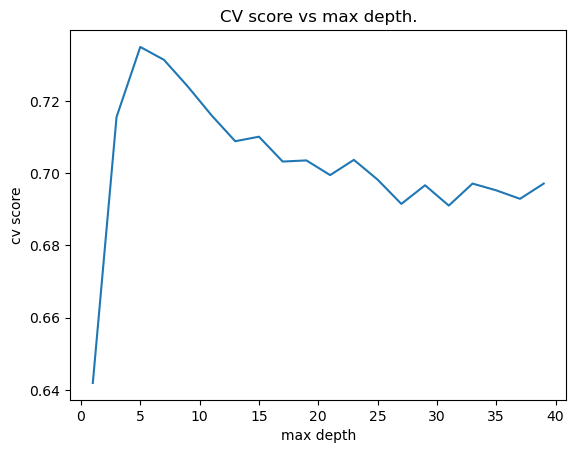

In [59]:
plt.plot(depths,cv_accuracies)
plt.title('CV score vs max depth.')
plt.xlabel('max depth')
plt.ylabel('cv score');

In [60]:
depths[np.array(cv_accuracies).argmax()]

5

In [61]:
max(cv_accuracies)

0.7349154612978889

The above shows that for a max depth = 5, we achieve the maximum cross validation score of 73%.

To gain a better understanding of the boundaries formed using Decision Trees vs KNN, let's visualise two of the X columns and see the difference in the boundaries formed. For KNN, this was done in the previous section using 2 PCAs. Let's replicate using Decision Trees to see the difference. Note, the optimum hyperparameters calculated in the previous sections are used, but there is nothing to say that when  using PCAs, the same parameter choice will be optimum. The purpose of this plotting is to visualise what is happening, and as we are less interested in comparing accuracies, we shall ignore this for now.

In [62]:
#training decision tree
my_dt = DecisionTreeClassifier(max_depth=5)
my_dt.fit(X_train_2_pca,y_train)

my_knn = KNeighborsClassifier(n_neighbors = 11)
my_knn.fit(X_train_2_pca, y_train)

KNeighborsClassifier(n_neighbors=11)

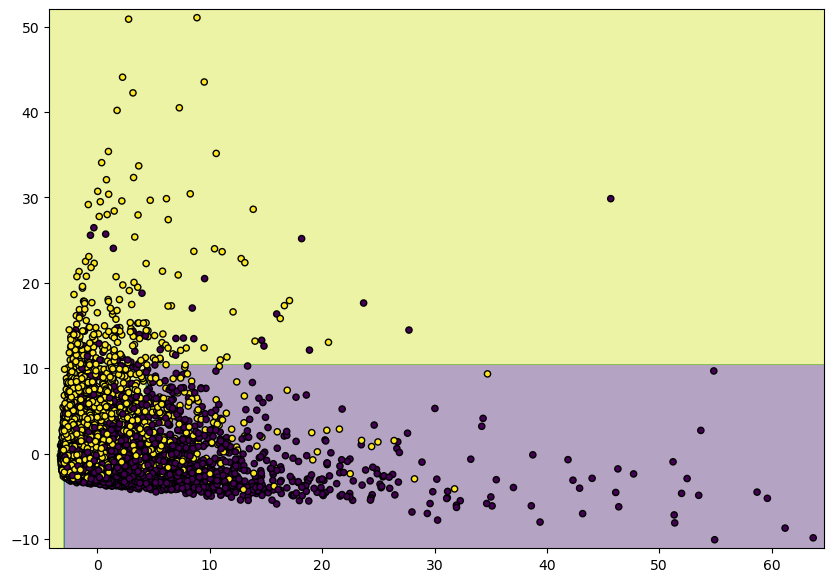

In [63]:
#decision tree 
PlotBoundaries(my_dt, X_train_2_pca,y_train, plotsize=(10,7))

/Users/henryparemain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


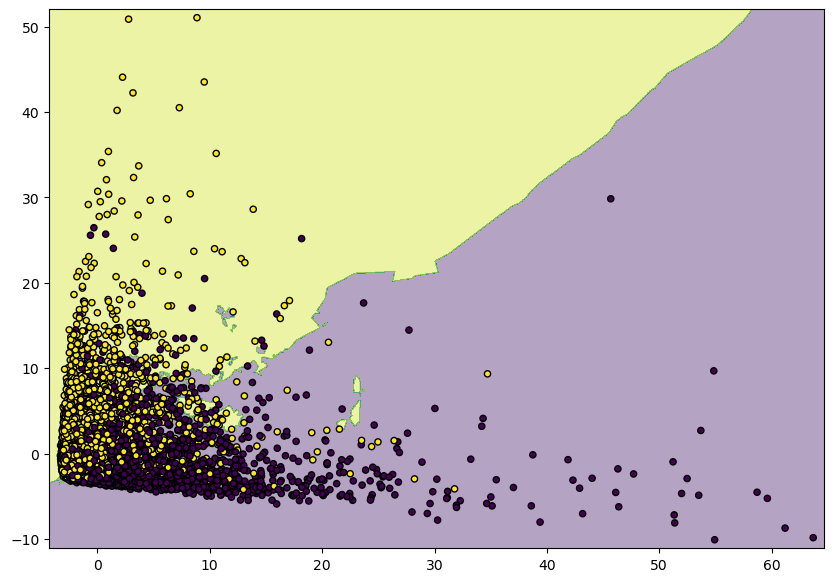

In [80]:
#KNN
PlotBoundaries(my_knn, X_train_2_pca,y_train, plotsize=(10,7))


As can be seen, the boundaries plotted for KNN and Decision trees varies significantly. One advantage of Decision Trees is that they tend to be more interpretible. One is able to analyse the branches of a decision tree to see what criteria was chosen at each node to split the data further. The same can not be said for KNN, where trying to understand which features are important for a certain class is much less clear.

A second advantage of Decision Trees is that they are much more better suited for larger datasets with high dimensionality. The computational power required for KNN with a large number of features is much greater than that of Decision Trees, which is able to split the data based on simple conditional statements. The distance calculations which KNN rely on becomes computationally very expensive as dimensionality increases.

One downfall of Decision Trees is that they are an unstable model. A small variation in the dataset can cause the structure of the tree to change significantly, meaning that they can be succeptible to poor generalisation. 

A second downfall of Decision Trees is that they are very succeptible to overfitting. Beyond a certain depth, the decision tree will try to make each row of the data the 'final rule'. By this, it will have very high (often 100%) accuracies on the training data, as it will learn all of the required decision boundaries. However, when presented with a slightly different dataset, the same conditions will not apply and the model will perform poorly. 

# Validation vs Test data

The validation set is a subset of the training data, and a requirement to carry out cross validation. Cross validation is used as part of a hyperparameter optimisation process. The training data is 'folded' into usually 5 or 10 parts. One part is always saved as a validation set, which is used to provide a test result. For each iteration of a particular hyperparameter, the validaiton set provides a model score. If 5 folds are used, this means that 5 different validation sets are used to obtain 5 model scores. The average of these 5 model scores is then used to decide if a certain hyperparameter value is good or bad. 

In this way, the model can be optimised, so that when the final parameters have been chosen, the final model can be tested on a set of data which has never been touched in the modelling phase. This ensures that the test score for the model is valid, as no data from the  test set has leaked into the training of the model. 

If we tried to train the model without a validation set, there would be no way to test intermediate phases of the model on different hyperparameters, without leaking data.

# Cross Validation with Logistic Regression

The following code reruns the logistic regression model, using a 5-fold validation within a Grid Search to find the best hyperparameter configuration. For speed, the sampled train and test data is to be used when running the Grid Search.

In [64]:
from sklearn.pipeline import Pipeline
# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), 
                        ('dim_reducer', PCA()), 
                        ('model', LogisticRegression())])

Note that the c_values only go up to 0.001. Values higher than this were tried, but the run time was 10min+ for each cvalue >= 0.01. This suggests that the model had too much freedom and was running the risk of overfitting. Hence, as time is limited, the c_values were reduced. There is a chance that a larger c value may have provided a more optimal result. 

_NB the below code is commented out for run time considerations_

In [87]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV

# c_values = [.00001, .0001, .001]

# # Parameter grid
# logreg_param_grid = [  
#     #l2 - No PCA
#     {'scaler': [StandardScaler()],
#      'dim_reducer':[None],
#      'model': [LogisticRegression(solver = 'sag', penalty='l2', random_state=1, n_jobs=-1, max_iter=10000)],
#      'model__C': c_values},

#     #l2 - PCA
#     {'scaler': [StandardScaler()],
#      'dim_reducer':[PCA()],
#      'dim_reducer__n_components': [0.85],
#      'model': [LogisticRegression(solver = 'sag', penalty='l2', random_state=1, n_jobs=-1, max_iter=10000)],
#      'model__C': c_values}]

In [88]:
# # cv=5 means we are using a 5-fold cross validation.
# logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=3)

# # Fit the log reg grid search
# fitted_logreg_gs = logreg_gs.fit(X_train_sample, y_train_sample)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 3/5] END dim_reducer=None, model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, solver='sag'), model__C=1e-05, scaler=StandardScaler();, score=0.615 total time=   7.8s
[CV 3/5] END dim_reducer=None, model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, solver='sag'), model__C=0.0001, scaler=StandardScaler();, score=0.765 total time=   8.1s
[CV 1/5] END dim_reducer=None, model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, solver='sag'), model__C=1e-05, scaler=StandardScaler();, score=0.605 total time=   8.2s
[CV 5/5] END dim_reducer=None, model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, solver='sag'), model__C=1e-05, scaler=StandardScaler();, score=0.608 total time=   8.3s
[CV 4/5] END dim_reducer=None, model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, solver='sag'), model__C=1e-05, scaler=StandardScaler();, score=0.619 total time=   8.3s
[CV 

_Note, if there was more time available to run the Grid Search on a large net of options, it would be interesting to see if an l1 penalty behaved better, as well as trying a larger range of PCA variance reduction factors. However, the limited iterations that have been run still show a marked improvement on the baseline model._

In [89]:
# import joblib
# fitted_logreg_gs_q5 = joblib.dump(fitted_logreg_gs,'fitted_logreg_gs_q5.pkl')

In [65]:
fitted_logreg_gs_q5 = joblib.load('fitted_logreg_gs_q5.pkl')

In [66]:
fitted_logreg_gs_q5.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.85)),
                ('model',
                 LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1,
                                    random_state=1, solver='sag'))])

In [67]:
fitted_logreg_gs_q5.best_score_

0.7730519448788116

Let's test the fitted_logreg_gs on the test_sample data.

In [69]:
fitted_logreg_gs_q5.score(X_test_sample,y_test_sample)

0.7716830754805438

From the above grid search, the best estimators are using a StandardScaler, a PCA with 85% of the variance explained, and a C value of 0.001. In an ideal world, the above GridSearch would be run with more combination of parameters, but due to time contraints, the above model is all that could be afforded. 

The score of 77% from the Grid Search model is an improvement on the initial baseline logistic regression model which had a score of 73%.

# Confusion Matrix

In [70]:
y_pred = fitted_logreg_gs_q5.best_estimator_.predict(X_test_sample)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test_sample, y_pred))
confusion_df.rename(columns={0:'Predicted Negative',1:'Predicted Positive'},inplace=True)
confusion_df.rename(index={0:'True Negative',1:'True Positive'}, inplace =True)

In [72]:
confusion_df

,Predicted Negative,Predicted Positive
True Negative,620,284
True Positive,203,1026


In [73]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test_sample, y_pred)

0.783206106870229

In [74]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test_sample, y_pred)

0.8348250610252238

As can be seen in the above, the precision of the improved logistic regression model is 78%, whilst the recall is 84%. This means that of the reviews which the model predicted as positive, 78% were indeed positive. Out of all of the truly positive reviews, 84% were correctly identified.

# Feature Engineering to improve accuracy

One new feature that could be interesting to consider is bucketing the `Review_Total_Negative_Word_Counts` and `Review_Total_Positive_Word_Counts`. Currently, these provide data on how many of the positive and negative tokens are found in each review. The actual value of these columns is not actually that important. What is more important is whether the number is higher or lower than the average review. By bucketing these columns into 'low', 'medium' and 'high', there is a chance that less noise and more signal comes from it.

In [121]:
#resetting the train_data_sample
train_data_sample = train_data.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5))
train_data_sample.reset_index(inplace=True)

In [122]:
train_data_sample = train_data_sample.drop(columns=['index'])

In [123]:
train_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,713,8.3,11,2826,21,3,215,51.524139,-0.138081,5,...,0,0,0,0,0,0,0,0,0,0
1,1936,8.7,0,7491,7,2,681,51.510841,-0.078058,1,...,0,0,0,0,0,0,0,0,0,0
2,1831,8.1,6,7105,4,1,189,51.499046,-0.191707,3,...,0,0,0,0,0,0,0,0,0,0
3,1427,8.8,11,4305,0,1,701,51.557696,-0.283526,2,...,0,0,0,0,0,0,0,0,0,0
4,377,8.5,2,1363,3,1,108,51.515864,-0.120063,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#resetting the test_data_sample
test_data_sample = test_data.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5))
test_data_sample.reset_index(inplace=True)

In [125]:
test_data_sample = test_data_sample.drop(columns=['index'])

In [126]:
test_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,406,8.2,72,2011,0,9,324,51.517972,-0.128049,1,...,0,0,0,0,1,0,0,0,0,0
1,55,7.6,8,301,4,36,219,51.521526,-0.153304,1,...,0,0,0,0,0,0,0,0,0,0
2,101,8.7,7,393,10,11,693,51.493616,-0.159235,3,...,0,0,0,0,0,0,0,0,0,0
3,241,7.5,65,1287,6,2,66,51.516843,-0.149557,0,...,0,0,0,0,0,0,0,0,0,0
4,438,7.4,35,1786,30,9,79,51.496740,-0.206472,1,...,0,0,0,0,0,0,0,0,0,0


In [127]:
train_data_sample['Review_Total_Positive_Word_Counts'].describe()

count    6398.000000
mean       16.312285
std        18.374511
min         0.000000
25%         5.000000
50%        11.000000
75%        21.000000
max       241.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64

In [128]:
train_data_sample['Review_Total_Negative_Word_Counts'].describe()

count    6398.000000
mean       19.056893
std        29.927063
min         0.000000
25%         2.000000
50%        10.000000
75%        24.000000
max       393.000000
Name: Review_Total_Negative_Word_Counts, dtype: float64

Using pd.cut to bucket the colums in question...

In [129]:
test_data_sample['review_total_positive_wordcount_bins'] = pd.cut(test_data_sample.Review_Total_Positive_Word_Counts, bins=[-1, 7, 20, np.inf], labels=['low','medium','high'])
train_data_sample['review_total_positive_wordcount_bins'] = pd.cut(train_data_sample.Review_Total_Positive_Word_Counts, bins=[-1, 7, 20, np.inf], labels=['low','medium','high'])

These categorical values should now be one hot encoded into three seperate columns. 

In [130]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
wordcount_bins_train = pd.DataFrame(train_data_sample['review_total_positive_wordcount_bins'])
wordcount_bins_train = ohe.fit_transform(wordcount_bins_train)


dense_array = wordcount_bins_train.toarray()
ohe.categories_[0]

array(['high', 'low', 'medium'], dtype=object)

In [131]:
wordcount_bins_train = pd.DataFrame(dense_array, columns=[i for i in ohe.get_feature_names_out()], dtype=int)
wordcount_bins_train.head()

,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [132]:
wordcount_bins_train['review_total_positive_wordcount_bins_medium'].sum()

2501

In [133]:
wordcount_bins_train.review_total_positive_wordcount_bins_low.sum()

2268

The bins are distributed fairly evenly. Let's continue.

In [134]:
train_data_sample.reset_index(inplace=True)

In [135]:
train_data_sample = pd.concat([train_data_sample, wordcount_bins_train], axis = 1)
train_data_sample  = train_data_sample.drop(columns=['index','review_total_positive_wordcount_bins'])

In [136]:
train_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium
0,713,8.3,11,2826,21,3,215,51.524139,-0.138081,5,...,0,0,0,0,0,0,0,0,0,0
1,1936,8.7,0,7491,7,2,681,51.510841,-0.078058,1,...,0,0,0,0,0,0,0,0,1,0
2,1831,8.1,6,7105,4,1,189,51.499046,-0.191707,3,...,0,0,0,0,0,0,0,0,1,0
3,1427,8.8,11,4305,0,1,701,51.557696,-0.283526,2,...,0,0,0,0,0,0,0,0,1,0
4,377,8.5,2,1363,3,1,108,51.515864,-0.120063,0,...,0,0,0,0,0,0,0,0,1,0


Let's repeat for the test_data_sample dataframe.

In [137]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
wordcount_bins_test = pd.DataFrame(test_data_sample['review_total_positive_wordcount_bins'])
wordcount_bins_test = ohe.fit_transform(wordcount_bins_test)

dense_array = wordcount_bins_test.toarray()
dense_array
ohe.categories_[0]

array(['high', 'low', 'medium'], dtype=object)

In [138]:
wordcount_bins_test = pd.DataFrame(dense_array, columns=[i for i in ohe.get_feature_names_out()], dtype=int)
wordcount_bins_test.head()

,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium
0,1,0
1,1,0
2,0,1
3,1,0
4,0,0


In [139]:
wordcount_bins_test.review_total_positive_wordcount_bins_medium.sum()

825

In [140]:
wordcount_bins_test.review_total_positive_wordcount_bins_low.sum()

785

The bins are distributed fairly evenly. Let's continue.

In [141]:
test_data_sample.reset_index(inplace=True)

In [142]:
test_data_sample = pd.concat([test_data_sample, wordcount_bins_test], axis = 1)

In [144]:
test_data_sample = test_data_sample.drop(columns=['review_total_positive_wordcount_bins','index'])

In [145]:
test_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium
0,406,8.2,72,2011,0,9,324,51.517972,-0.128049,1,...,0,0,1,0,0,0,0,0,1,0
1,55,7.6,8,301,4,36,219,51.521526,-0.153304,1,...,0,0,0,0,0,0,0,0,1,0
2,101,8.7,7,393,10,11,693,51.493616,-0.159235,3,...,0,0,0,0,0,0,0,0,0,1
3,241,7.5,65,1287,6,2,66,51.516843,-0.149557,0,...,0,0,0,0,0,0,0,0,1,0
4,438,7.4,35,1786,30,9,79,51.496740,-0.206472,1,...,0,0,0,0,0,0,0,0,0,0


#### Doing the same as above but for the `Review_Total_Negative_Word_Counts` 

In [146]:
test_data_sample['review_total_negative_wordcount_bins'] = pd.cut(test_data_sample.Review_Total_Negative_Word_Counts, bins=[-1, 4, 24, np.inf], labels=['low','medium','high'])
train_data_sample['review_total_negative_wordcount_bins'] = pd.cut(train_data_sample.Review_Total_Negative_Word_Counts, bins=[-1, 4, 24, np.inf], labels=['low','medium','high'])

These categorical values should now be one hot encoded into three seperate columns. 

In [147]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
wordcount_bins_train = pd.DataFrame(train_data_sample['review_total_negative_wordcount_bins'])
wordcount_bins_train = ohe.fit_transform(wordcount_bins_train)


dense_array = wordcount_bins_train.toarray()
ohe.categories_[0]

array(['high', 'low', 'medium'], dtype=object)

In [148]:
wordcount_bins_train = pd.DataFrame(dense_array, columns=[i for i in ohe.get_feature_names_out()], dtype=int)
wordcount_bins_train.head()

,review_total_negative_wordcount_bins_low,review_total_negative_wordcount_bins_medium
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [149]:
wordcount_bins_train['review_total_negative_wordcount_bins_medium'].sum()

2607

In [150]:
wordcount_bins_train['review_total_negative_wordcount_bins_low'].sum()

2202

The bins are distributed fairly evenly. Let's continue.

In [151]:
train_data_sample = pd.concat([train_data_sample, wordcount_bins_train], axis = 1)

In [152]:
train_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_year,n_yes,n_yet,n_young,rating,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium,review_total_negative_wordcount_bins,review_total_negative_wordcount_bins_low,review_total_negative_wordcount_bins_medium
0,713,8.3,11,2826,21,3,215,51.524139,-0.138081,5,...,0,0,0,0,0,0,0,medium,0,1
1,1936,8.7,0,7491,7,2,681,51.510841,-0.078058,1,...,0,0,0,0,0,1,0,low,1,0
2,1831,8.1,6,7105,4,1,189,51.499046,-0.191707,3,...,0,0,0,0,0,1,0,medium,0,1
3,1427,8.8,11,4305,0,1,701,51.557696,-0.283526,2,...,0,0,0,0,0,1,0,medium,0,1
4,377,8.5,2,1363,3,1,108,51.515864,-0.120063,0,...,0,0,0,0,0,1,0,low,1,0


Let's repeat for the test_data_sample dataframe.

In [153]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
wordcount_bins_test = pd.DataFrame(test_data_sample['review_total_negative_wordcount_bins'])
wordcount_bins_test = ohe.fit_transform(wordcount_bins_test)

dense_array = wordcount_bins_test.toarray()
dense_array
ohe.categories_[0]

array(['high', 'low', 'medium'], dtype=object)

In [154]:
wordcount_bins_test = pd.DataFrame(dense_array, columns=[i for i in ohe.get_feature_names_out()], dtype=int)
wordcount_bins_test.head()

,review_total_negative_wordcount_bins_low,review_total_negative_wordcount_bins_medium
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0


In [155]:
wordcount_bins_test.review_total_negative_wordcount_bins_medium.sum()

848

In [156]:
wordcount_bins_test.review_total_negative_wordcount_bins_low.sum()

716

The bins are distributed fairly evenly. Let's continue.

In [157]:
test_data_sample = pd.concat([test_data_sample, wordcount_bins_test], axis = 1)

In [158]:
test_data_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_year,n_yes,n_yet,n_young,rating,review_total_positive_wordcount_bins_low,review_total_positive_wordcount_bins_medium,review_total_negative_wordcount_bins,review_total_negative_wordcount_bins_low,review_total_negative_wordcount_bins_medium
0,406,8.2,72,2011,0,9,324,51.517972,-0.128049,1,...,0,0,0,0,0,1,0,high,0,0
1,55,7.6,8,301,4,36,219,51.521526,-0.153304,1,...,0,0,0,0,0,1,0,medium,0,1
2,101,8.7,7,393,10,11,693,51.493616,-0.159235,3,...,0,0,0,0,0,0,1,medium,0,1
3,241,7.5,65,1287,6,2,66,51.516843,-0.149557,0,...,0,0,0,0,0,1,0,high,0,0
4,438,7.4,35,1786,30,9,79,51.496740,-0.206472,1,...,0,0,0,0,0,0,0,high,0,0


In [159]:
test_data_sample = test_data_sample.drop(columns='review_total_negative_wordcount_bins')
train_data_sample = train_data_sample.drop(columns='review_total_negative_wordcount_bins')

In [160]:
y_train_sample = train_data_sample['rating']
X_train_sample = train_data_sample.drop(columns='rating')

In [161]:
y_test_sample = test_data_sample['rating']
X_test_sample = test_data_sample.drop(columns='rating')

The below grid search is used to compare PCA vs no PCA using l2 penalty and a sag solver, and trying three iterations of C-values. If there was more time, it would be interesting to compare scalers and different solvers, but the grid search was taking too long for larger grids than that below.

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

c_values = [.00001, .0001, .001]

# Parameter grid
logreg_param_grid = [  
    #l2 - No PCA
    {'scaler': [StandardScaler()],
     'dim_reducer':[None],
     'model': [LogisticRegression(solver = 'sag', penalty='l2', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values},

    #l2 - PCA
    {'scaler': [StandardScaler()],
     'dim_reducer':[PCA()],
     'dim_reducer__n_components': [0.85],
     'model': [LogisticRegression(solver = 'sag', penalty='l2', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values}]

_NB the cell below takes a while to run - load pickles instead_

In [163]:
# # cv=5 means we are using a 5-fold cross validation.
# logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=3)

# # Fit the log reg grid search
# fitted_logreg_gs_features_added_v3 = logreg_gs.fit(X_train_sample, y_train_sample)

In [164]:
# import joblib
# fitted_logreg_gs_features_added_v3 = joblib.dump(fitted_logreg_gs_features_added_v3,'fitted_logreg_features_added_v3.pkl')

In [169]:
fitted_logreg_gs_features_added_v3 = joblib.load('fitted_logreg_features_added_v3.pkl')

In [170]:
fitted_logreg_gs_features_added_v3.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.85)),
                ('model',
                 LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1,
                                    random_state=1, solver='sag'))])

In [171]:
fitted_logreg_gs_features_added_v3.best_score_

0.7753976495308835

Let's test the fitted_logreg_gs on the test_sample data.

In [172]:
fitted_logreg_gs_features_added_v3.score(X_test_sample,y_test_sample)

0.7641819034224098

The previous model had an accuracy of 0.7735583684950773. When building this model, the results seem to fluctuate between 0.76 and 0.78. This suggests that on some iterations, the added feature is helping. However, the benefit is not significant. If there were more time, a more in depth hyperparameter optimisation may go to show that the added feature does in fact benefit the model.

In [173]:
y_pred = fitted_logreg_gs_features_added_v3.best_estimator_.predict(X_test_sample)

In [174]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test_sample, y_pred))
confusion_df.rename(columns={0:'Predicted Negative',1:'Predicted Positive'},inplace=True)
confusion_df.rename(index={0:'True Negative',1:'True Positive'}, inplace =True)

In [175]:
confusion_df

,Predicted Negative,Predicted Positive
True Negative,615,289
True Positive,214,1015


In [176]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test_sample, y_pred)

0.7783742331288344

The previous precision was 0.7812971342383107. As mentioned above, the precision of the model with the new feature seems to fluctuate, sometimes suggesting an improvement. On the whole, no real benefit has been gained from the added feature.

In [180]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test_sample, y_pred)

0.8258746948738812

The recall has dropped slightly from 0.8348250610252238
.

The added feature has made no noticeable improvement on the accuracy of the model. There are a few reasons that could be causing this. One is that as we are pickling our models, and have rerun the trained sample data, there is a chance that the training_data_sample and test_data_sample differs to the original model we are comparing to. This in and of itself would lead to different model scores, regardless of whether we had added any new features or not. This is something to be aware of going forward - pickle the sampled train and test data from the outset, and do not touch it, to ensure that models are based off the same training model. There is unfortunately not the time to go back and rerun all the models at this stage, but it is a good thing to be aware of for future projects. 

The other reason could just be that the feature is not beneficial to signal of the model and is instead just adding more noise. There is a chance that with further hyperparameter optimisation that the model with added features could be improved. 